In [124]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_docs.plots
import tensorflow_docs.modeling
import tensorflow_docs as tfdocs

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Data Import & Preparation

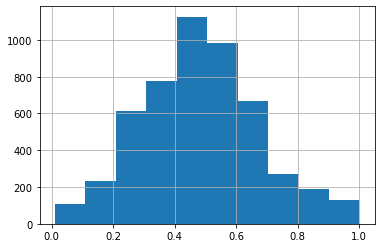

In [125]:
df = pd.read_csv('data.csv')
df = df.drop(['raw', 'meditation'], axis=1)
# df = df[(df.attention > 0) & (df.attention < 100)]
df.attention = df.attention / 100

df.attention.hist()

In [126]:
X = np.array(df.drop('attention', axis=1))
y = np.array(df[['attention']])

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4079, 8), (1020, 8), (4079, 1), (1020, 1))

## Model

In [132]:
def build_model():
    clear_session()
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(1e-2)
    # optimizer = RMSprop(1e-2)
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae', 'mse'])
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [133]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, min_lr=0)
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, batch_size=32, callbacks=[es, reduce_lr], verbose=2)

Epoch 1/1000
102/102 - 0s - loss: 0.1838 - mae: 0.1838 - mse: 0.0579 - val_loss: 0.1390 - val_mae: 0.1390 - val_mse: 0.0317 - lr: 0.0100
Epoch 2/1000
102/102 - 0s - loss: 0.1374 - mae: 0.1374 - mse: 0.0303 - val_loss: 0.1330 - val_mae: 0.1330 - val_mse: 0.0297 - lr: 0.0100
Epoch 3/1000
102/102 - 0s - loss: 0.1340 - mae: 0.1340 - mse: 0.0291 - val_loss: 0.1329 - val_mae: 0.1329 - val_mse: 0.0315 - lr: 0.0100
Epoch 4/1000
102/102 - 0s - loss: 0.1323 - mae: 0.1323 - mse: 0.0288 - val_loss: 0.1321 - val_mae: 0.1321 - val_mse: 0.0311 - lr: 0.0100
Epoch 5/1000
102/102 - 0s - loss: 0.1316 - mae: 0.1316 - mse: 0.0287 - val_loss: 0.1337 - val_mae: 0.1337 - val_mse: 0.0311 - lr: 0.0100
Epoch 6/1000
102/102 - 0s - loss: 0.1317 - mae: 0.1317 - mse: 0.0284 - val_loss: 0.1305 - val_mae: 0.1305 - val_mse: 0.0297 - lr: 0.0100
Epoch 7/1000
102/102 - 0s - loss: 0.1299 - mae: 0.1299 - mse: 0.0273 - val_loss: 0.1336 - val_mae: 0.1336 - val_mse: 0.0307 - lr: 0.0100
Epoch 8/1000
102/102 - 0s - loss: 0.1306 

Text(0, 0.5, 'Loss (MAE)')

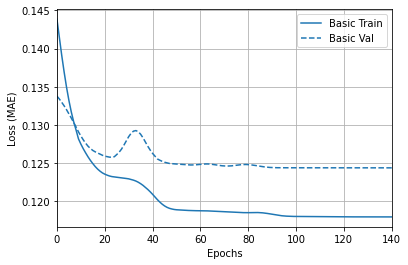

In [134]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric="mae")
plt.ylabel('Loss (MAE)')

## Prediction

In [135]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

32/32 - 0s - loss: 0.1144 - mae: 0.1144 - mse: 0.0217


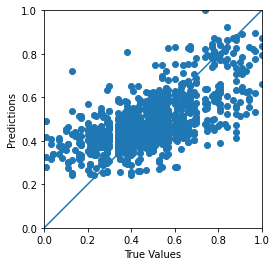

In [136]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
